In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Function definitions

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
# !ls 'drive/My Drive/hackathon-2021'

missing_values = ["n/a", "na", "--", "NaN"]
data = pd.read_csv('drive/My Drive/hackathon-2021/carbonTaxAll.csv', na_values = missing_values)

In [4]:
# drop unused price label columns
column_names = data.columns

for i in column_names:
  if ('Price_label' in i) or ('Instrument' in i) or ('Price_rate_2' in i):
    data.drop(i , axis='columns', inplace=True)

# drop Name of Initiative
data.drop('Name of the initiative', axis='columns', inplace=True)

In [5]:
# rename time related column names accordingly, keep only time related substring
column_names = data.columns

for i in column_names:
  if ('Price_rate_1_' in i):
    new_col_name = i.replace('Price_rate_1_','')
    data.rename(columns = {i:new_col_name}, inplace = True)
  if ('Price_rate_2_' in i):
    new_col_name = i.replace('Price_rate_2_','')
    data.rename(columns = {i:new_col_name}, inplace = True)

In [6]:
# data.reset_index(drop=True, inplace=True)
index_names = data[ data['Jurisdiction Covered'] != 'Alberta' ].index 
data.drop(index_names, inplace = True)

In [7]:
data.drop(1, inplace = True)


In [8]:
data.drop('Jurisdiction Covered', axis='columns', inplace = True)

In [9]:
data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.974656,14.605648,11.864273,14.888337,15.577942,15.125542,14.753615,13.602975,11.893435,15.375294,23.973137,23.252205,22.493795,22.629503


In [10]:
timeSeries = data.transpose()

In [11]:
timeSeries.rename(columns = {0:'carbon_price'}, inplace = True) 

In [12]:
timeSeries.reset_index( inplace=True)

In [13]:
timeSeries.rename(columns = {'index':'year'}, inplace = True) 
timeSeries.columns

Index(['year', 'carbon_price'], dtype='object')

In [14]:
# Producing time series for Alberta
timeSeries.tail()

,year,carbon_price
26,2016,15.375294
27,2017,23.973137
28,2018,23.252205
29,2019,22.493795
30,2020,22.629503


In [15]:
timeSeries.dtypes
timeSeries.year = timeSeries.year.astype(str).astype(float)

timeSeries['year'] =  pd.to_datetime(timeSeries.year, format='%Y')

In [16]:
timeSeries = timeSeries.set_index('year')

In [17]:
timeSeries.tail()

,carbon_price
year,
2016-01-01,15.375294
2017-01-01,23.973137
2018-01-01,23.252205
2019-01-01,22.493795
2020-01-01,22.629503


In [18]:
y = timeSeries['carbon_price'].resample('Y').sum()

In [19]:
y

year
1990-12-31     0.000000
1991-12-31     0.000000
1992-12-31     0.000000
1993-12-31     0.000000
1994-12-31     0.000000
1995-12-31     0.000000
1996-12-31     0.000000
1997-12-31     0.000000
1998-12-31     0.000000
1999-12-31     0.000000
2000-12-31     0.000000
2001-12-31     0.000000
2002-12-31     0.000000
2003-12-31     0.000000
2004-12-31     0.000000
2005-12-31     0.000000
2006-12-31     0.000000
2007-12-31    12.974656
2008-12-31    14.605648
2009-12-31    11.864273
2010-12-31    14.888337
2011-12-31    15.577942
2012-12-31    15.125542
2013-12-31    14.753615
2014-12-31    13.602975
2015-12-31    11.893435
2016-12-31    15.375294
2017-12-31    23.973137
2018-12-31    23.252205
2019-12-31    22.493795
2020-12-31    22.629503
Freq: A-DEC, Name: carbon_price, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


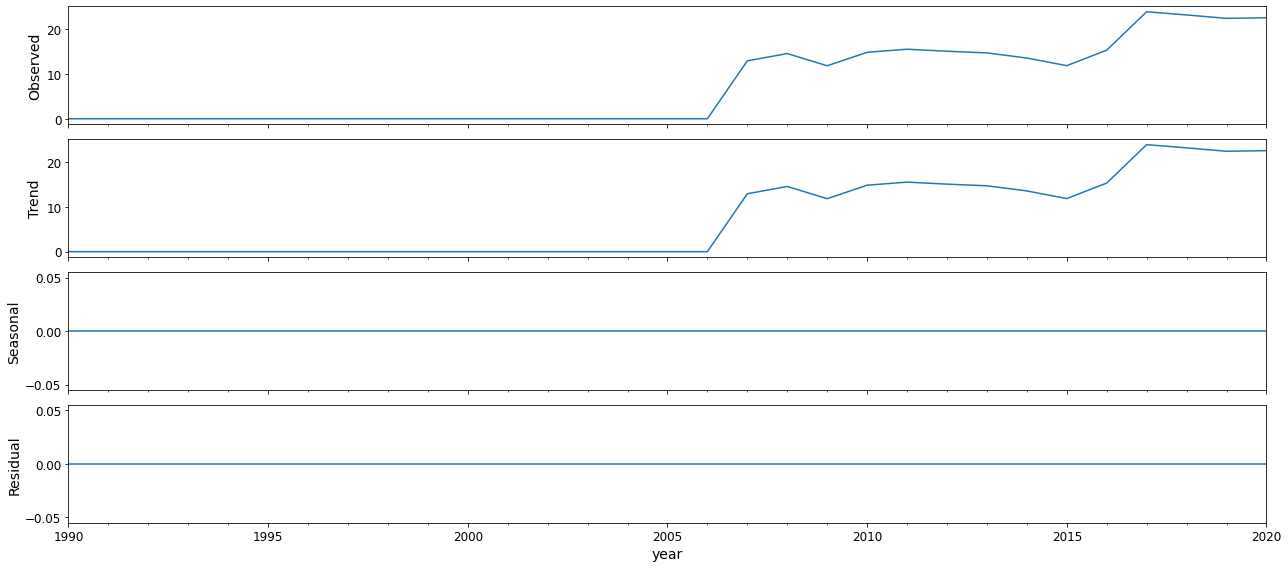

In [20]:
import matplotlib
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:234.8780989485747
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:146.70152694864942
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:154.8090786162379
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:62.23572097565754
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:198.19588138917788
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:122.48802645351599
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:137.08055544276652
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:56.05762676811028
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:150.0440047049787
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:106.68029419624605
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:104.43918590439662
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:37.24488974514385
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:147.22341055445872
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:102.36987832350148
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:106.0261943205749
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:38.63406112981089
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:155.7298210475658
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:113.31013912003046
A

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                              
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2657      2.101     -0.126      0.899      -4.383       3.852
ma.L1          1.0000   3.18e+04   3.15e-05      1.000   -6.23e+04    6.23e+04
ar.S.L12      -0.8206      2.374     -0.346      0.730      -5.473       3.832
sigma2        11.3789   3.62e+05   3.15e-05      1.000   -7.09e+05    7.09e+05


To help us understand the accuracy of our forecasts, we compare predicted carbon tax of the time series, and we set forecasts to start at 2020–01–01 to the end of the data.

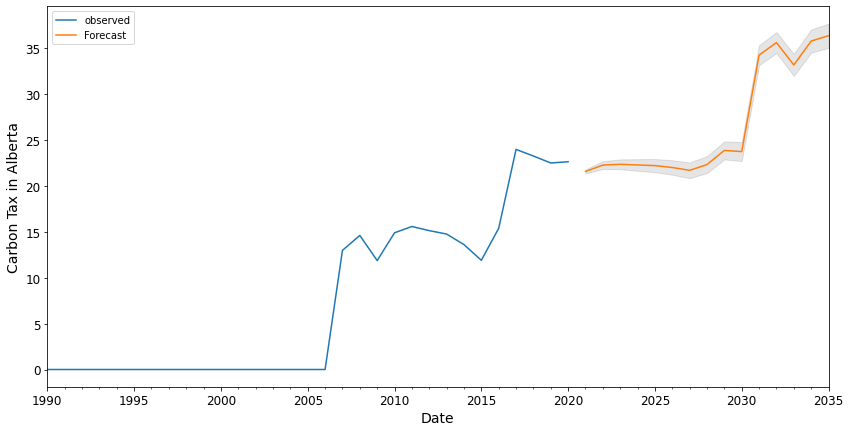

In [25]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int(alpha=0.95)

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Carbon Tax in Alberta')

plt.legend()
plt.show()

In [27]:
pred_ci

,lower carbon_price,upper carbon_price
2021-12-31,21.347343,21.796942
2022-12-31,21.837785,22.692059
2023-12-31,21.811062,22.886388
2024-12-31,21.643995,22.912338
2025-12-31,21.492012,22.925235
2026-12-31,21.212150,22.793732
2027-12-31,20.837527,22.554556
2028-12-31,21.399469,23.242048
2029-12-31,22.883195,24.843292
2030-12-31,22.698429,24.769387


Prediction of Energy Prices / Energy Consumer Price Index

Using

In [28]:
# Plotly version

import plotly.express as px

fig = px.line(x=y.index, y=y.values, title="Carbon Tax Prediction in Alberta", labels=dict(x="Year", y="Tax $", color="Place"))
fig.add_scatter(x=pred_ci.index, y=pred_ci['lower carbon_price'])
fig.update_layout(showlegend=False)
fig.show()

In [29]:
energy_prices = pd.read_csv('drive/My Drive/hackathon-2021/EnergyConsumerPricesIndex.csv', na_values = missing_values)

In [30]:
energy_prices.head()

,Year,CPI
0,1957,21.477
1,1958,21.531
2,1959,21.900
3,1960,22.431
4,1961,22.492


In [31]:
energy_prices.dtypes

energy_prices['Year'] =  pd.to_datetime(energy_prices.Year, format='%Y')

In [32]:
energy_prices = energy_prices.set_index('Year')

In [33]:
energy_prices.head()

,CPI
Year,
1957-01-01,21.477
1958-01-01,21.531
1959-01-01,21.900
1960-01-01,22.431
1961-01-01,22.492


In [34]:
y_energy = energy_prices['CPI'].resample('Y').sum()

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_energy,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:807.6495198755761
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:636.8856003528997
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:574.6244308928982
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:450.042706010012
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:560.3053203667041
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:539.4235686708229
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:458.82197555877326
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:437.6205777491914
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:717.6687445155848
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:564.5955452630046
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:510.3392179042721
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:397.7303635624963
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:511.41919981773015
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:485.20192362600324
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:419.2752358348002
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:391.2616741698416
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:500.7397993788679
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:418.0707375472043
ARIMA(0,

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:343.1541932295919
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:424.79043048978673
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:426.7707050095357
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:337.65471591455565
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:339.4512465456562
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:502.2493851700339


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:421.128952782402
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:447.82453528462764
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:337.44193114912474
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:425.37821820603745
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:420.3401668103595
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:339.6487896347064
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:334.07944549250135
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:501.54913090763966
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:418.65759272112103
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:447.1525650156025
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:335.8132729331521
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:418.3606801321155
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:420.35421302559865
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:330.42435337227795
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:332.1978134808987
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:495.11831792512373
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:412.3412308164589
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:440.03381556936483
A

In [37]:
mod = sm.tsa.statespace.SARIMAX(y_energy,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6780      0.270      2.510      0.012       0.149       1.207
ma.L1         -0.8606      0.205     -4.197      0.000      -1.262      -0.459
ar.S.L12      -1.0981      0.263     -4.181      0.000      -1.613      -0.583
sigma2       229.0335     43.155      5.307      0.000     144.451     313.616


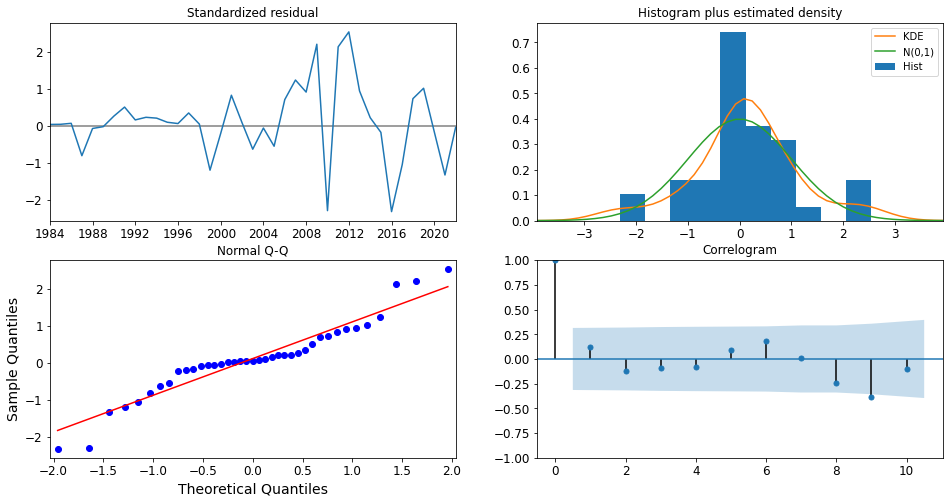

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

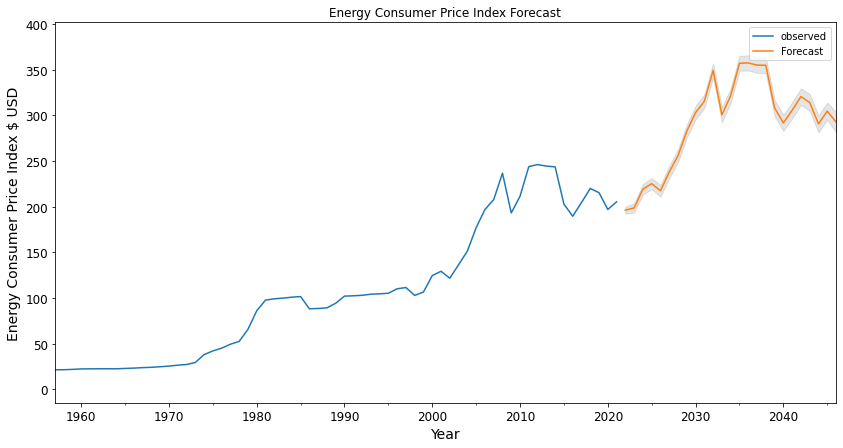

In [39]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int(alpha=0.80)

ax = y_energy.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2021-12-31'), y_energy.index[-1], alpha=.01, zorder=-2)

ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumer Price Index $ USD')
ax.set_title('Energy Consumer Price Index Forecast')
plt.legend()
plt.show()

In [41]:
# Plotly version

import plotly.express as px

fig = px.line(x=y_energy.index, y=y_energy.values, title="Energy Consumer Price Index", labels=dict(x="Year", y="Consumer Price Index for Energy", color="Place"))
fig.add_scatter(x=pred_ci.index, y=pred_ci['lower CPI'])
fig.update_layout(showlegend=False)
fig.show()